In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [0]:
df = pd.read_csv('BankMarket.csv').dropna()
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [0]:
#poutcome and contact are mostly unknown, hence we drop these columns
#Will consider dropping default column due to lack of yes/no values

df = df.drop(columns = ['contact','poutcome'])

In [0]:
#Reserved for doing categorisation of data

dict = {
    'no': 0,
    'yes': 1
}

dict_edu = {
    'primary': 1,
    'secondary':2,
    'tertiary':3,
}

dict_married = {
    'single': 1,
    'married': 2,
    'divorced': 3,
}

dict_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

dict_job = {
    'admin.': 1,
    'unemployed': 2,
    'management': 3,
    'housemaid': 4,
    'entrepreneur':5,
    "student": 6,
    "blue-collar": 7,
    "self-employed": 8,
    "retired": 9,
    "technician":10,
    "services":11
}


df['y'] = df['y'].map(dict)
df['default'] = df['default'].map(dict)
df['housing'] = df['housing'].map(dict)
df['loan'] = df['loan'].map(dict)
df['marital'] = df['marital'].map(dict_married)
df['education'] = df['education'].map(dict_edu)
df['month'] = df['month'].map(dict_month)
df['job'] = df['job'].map(dict_job)

#drop NaN columns
df = df.dropna()
df.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,3.0,2,3.0,2143,1,0,5,5,261,1,-1,0,0
1,44,10.0,1,2.0,29,1,0,5,5,151,1,-1,0,0
2,33,5.0,2,2.0,2,1,1,5,5,76,1,-1,0,0
5,35,3.0,2,3.0,231,1,0,5,5,139,1,-1,0,0
6,28,3.0,1,3.0,447,1,1,5,5,217,1,-1,0,0


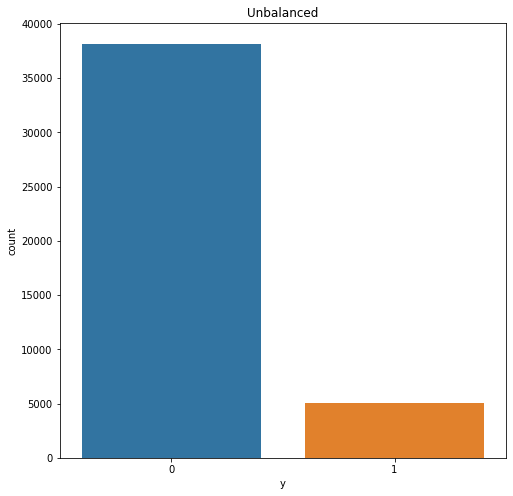

In [0]:
plt.figure(figsize=(8, 8))

sns.countplot('y', data=df)

plt.title('Unbalanced')

plt.show()

In [0]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all the yes class in a separate dataset.
yes_df = shuffled_df.loc[shuffled_df['y'] == 1]

#Randomly select ? observations from the no (majority class)
#n = (df.y == 1).count()
#print(n)
no_df = shuffled_df.loc[shuffled_df['y'] == 0].sample(n = 4900,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([yes_df, no_df])

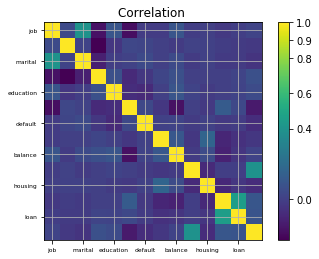

In [0]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

cax = ax1.imshow(df.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Correlation ')
labels=['age','job','marital','education','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','y',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[-0.4,0,.4,.6,.8,.9,1])
plt.show()

In [0]:
df.corr()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
age,1.000000,0.048045,0.403288,-0.167092,0.097602,-0.185152,-0.010029,-0.008451,0.094109,-0.004953,0.004050,-0.023248,0.001099,0.024760
job,0.048045,1.000000,0.017340,-0.228625,-0.034343,0.031785,0.026668,0.005483,-0.013050,0.011397,0.010491,-0.007834,-0.015997,-0.025936
marital,0.403288,0.017340,1.000000,-0.122251,-0.002058,0.013112,0.046938,0.005032,0.049605,-0.013029,0.007872,-0.020094,-0.014967,-0.045749
education,-0.167092,-0.228625,-0.122251,1.000000,0.069432,-0.080456,-0.028293,0.025957,0.073334,0.002482,0.004201,0.003683,0.024938,0.070920
balance,0.097602,-0.034343,-0.002058,0.069432,1.000000,-0.067037,-0.084378,0.004118,0.094138,0.020051,-0.016251,0.003928,0.016564,0.051386
housing,-0.185152,0.031785,0.013112,-0.080456,-0.067037,1.000000,0.037004,-0.029826,-0.175594,0.004017,-0.025554,0.124762,0.036803,-0.138300
loan,-0.010029,0.026668,0.046938,-0.028293,-0.084378,0.037004,1.000000,0.010957,0.020067,-0.013230,0.010447,-0.024369,-0.011367,-0.068802
day,-0.008451,0.005483,0.005032,0.025957,0.004118,-0.029826,0.010957,1.000000,0.105959,-0.030074,0.164982,-0.094343,-0.052053,-0.030247
month,0.094109,-0.013050,0.049605,0.073334,0.094138,-0.175594,0.020067,0.105959,1.000000,-0.013339,0.055813,-0.111210,-0.037150,0.016888
duration,-0.004953,0.011397,-0.013029,0.002482,0.020051,0.004017,-0.013230,-0.030074,-0.013339,1.000000,-0.083118,-0.002403,0.000295,0.397393


In [0]:
from sklearn.model_selection import train_test_split

x = normalized_df[['housing', 'loan',]]
y = normalized_df['y']

x.head()

,housing,loan
41787,0,0
40757,0,0
36829,1,1
44098,0,0
22465,0,0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

x_train.head()

,housing,loan
43104,0,0
43054,0,0
34946,1,1
34080,0,0
13260,0,0


In [0]:
from sklearn.svm import SVC

svClassifier = SVC(kernel = 'linear')
svClassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_test

11612    0
43099    1
42204    1
41870    0
28575    0
25247    0
678      0
31184    1
33663    0
41116    1
14070    0
14642    0
30634    0
44655    1
31284    0
12728    1
34723    0
43357    0
9530     0
24075    1
31149    1
348      0
12815    0
43721    1
43050    1
17697    1
40405    1
31071    1
19210    0
43677    1
        ..
14265    0
40656    1
38497    1
9593     0
40205    1
44689    1
34228    0
38262    1
18238    1
42982    1
31097    1
30747    1
21858    1
34229    0
17339    0
22938    1
17473    1
42268    1
4998     0
43722    1
26502    1
1602     0
2659     0
9515     1
42296    1
19828    0
27953    0
31825    0
31856    1
19121    0
Name: y, Length: 2481, dtype: int64

In [0]:
y_pred = svClassifier.predict(x_test)
y_pred # predicted result

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [0]:
from sklearn.metrics import accuracy_score
# show how accurate the model can predict
accuracy_score(y_test, y_pred)

0.6158806932688432

In [0]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[708, 489],
       [464, 820]], dtype=int64)